In [1]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import fmEphys as fme
import saccadeAnalysis as sacc


c:\Users\dmartins\anaconda3\envs\sacc2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dmartins\anaconda3\envs\sacc2\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\dmartins\anaconda3\envs\sacc2\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Loading DLC 2.3.0...


In [2]:
# recordings = fme.find('*fm1_ephys_props.h5', r'K:\freely_moving_ephys_SC\recordings')

# rec_dict = {}
# for r in recordings:
#     r_name = os.path.split(r)[1].split('_fm1')[0]
#     all_rs = fme.find('{}*ephys_props.h5'.format(r_name),
#                       r'K:\freely_moving_ephys_SC\recordings')
#     rec_dict[r_name] = all_rs

# data = sacc.stack_dataset(rec_dict)

# data = fme.replace_xr_obj(data)

# _savefile = 'K:/freely_moving_ephys_SC/recordings/SC_dataset.h5'
# fme.write_group_h5(data, _savefile)

In [3]:
data_path = 'K:/freely_moving_ephys_SC/recordings/SC_dataset.h5'
km_model = 'K:/saccade_models/KMeans_PSTH_model_062022.pickle'
pca_model = 'K:/saccade_models/PCA_PSTH_model_062022.pickle'
savepath = 'K:/freely_moving_ephys_SC'

Reading HfFm dataset.


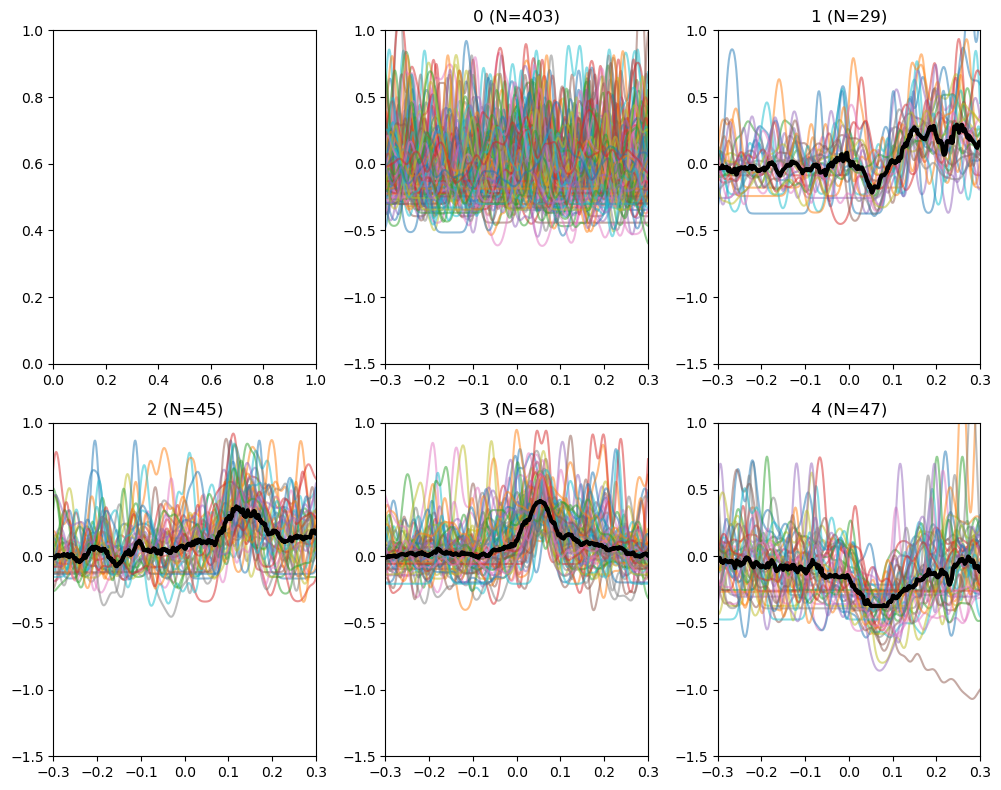

In [4]:
# Analyze dataset and apply clustering.
hffm, out = sacc.make_hffm_dataset(
    savepath=savepath,
    session_dict=None,
    hffm_path=data_path,
    km_model=km_model,
    pca_model=pca_model
)

# when a python dialog box opens, open the file "KMEANS_RESULTS.png" written to the savepath,
# and enter the appropriate clustering labels according to that .png figure.


In [7]:
temporal_sequence = out['Fm_pref_temseq']

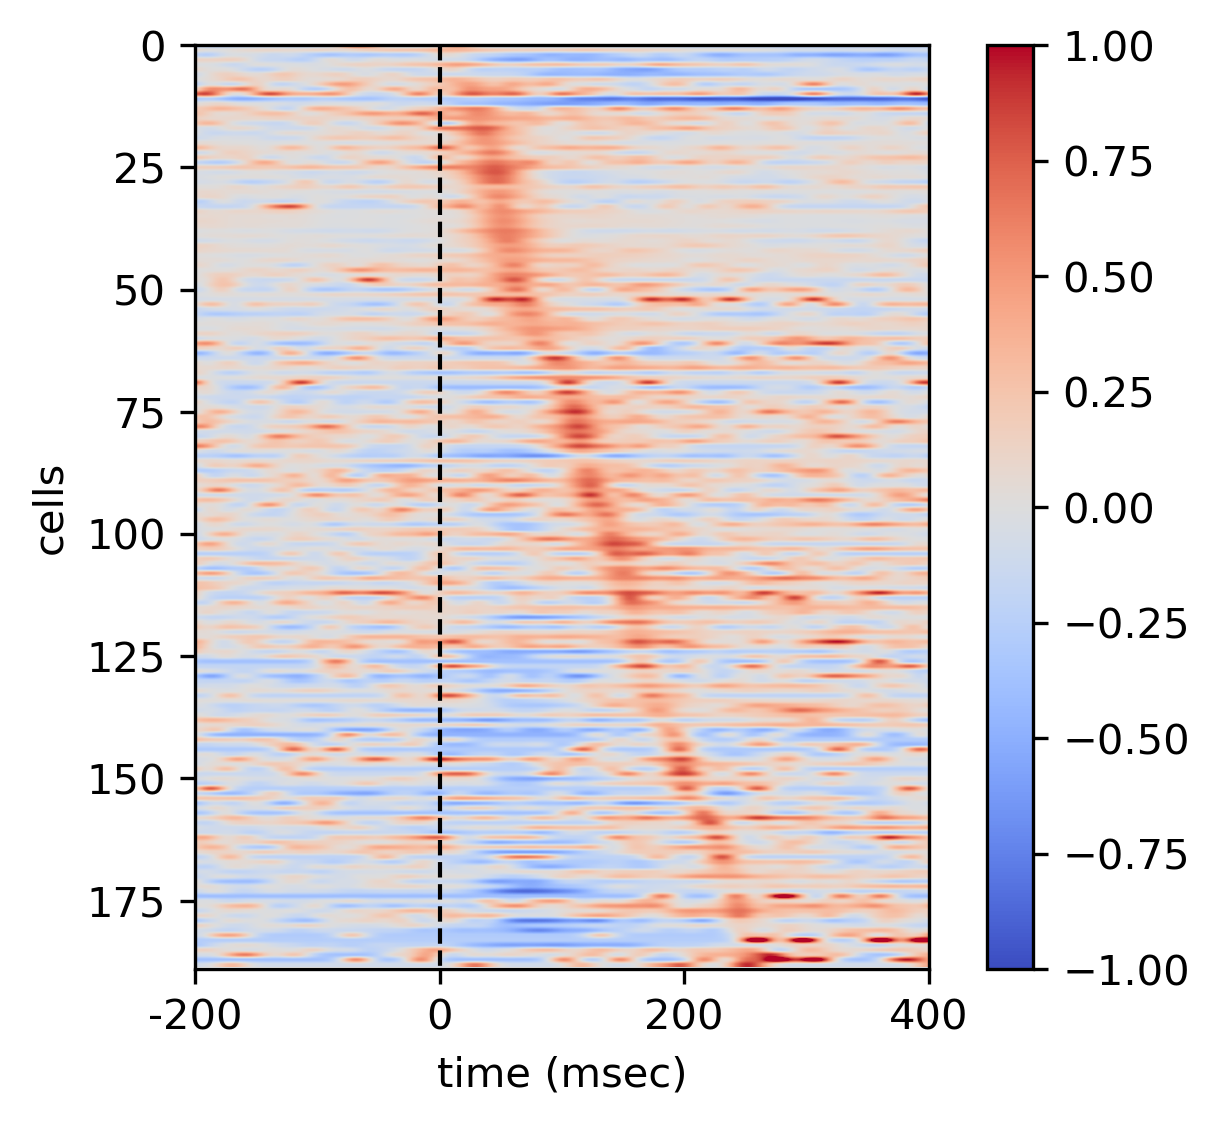

In [13]:
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, temporal_sequence, cscale=1)
ax.set_aspect(4.)
plt.colorbar(ax=ax, mappable=_im)

(0.0, 40.0)

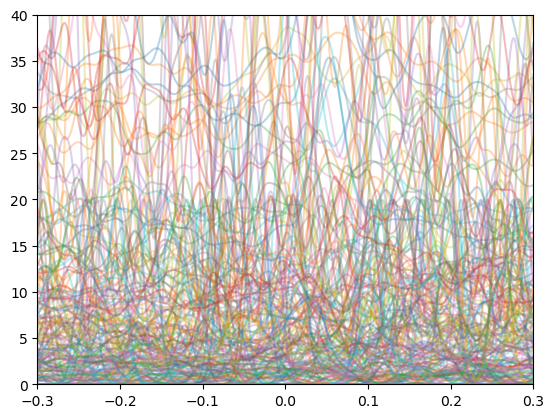

In [17]:
props = sacc.propsdict()
psth_bins = props['psth_bins']

for ind, row in hffm.iterrows():
    if row['gazecluster']!= 'unresponsive':
        plt.plot(psth_bins, row['pref_gazeshift_psth_raw'], alpha=0.3)
plt.xlim([-.3,.3])
plt.ylim([0,40])